# Boosting

In [1]:
# Definition: Boosting is an ensemble learning technique in machine learning that combines the predictions of
# multiple weak learners to create a strong learner. It focuses on correcting errors made by previous models 
# by giving more weight to misclassified instances in each iteration.

### Popular Algorithms: AdaBoost, Gradient Boosting, XGBoost.

# Ada Boost

In [2]:
# Objective: AdaBoost aims to improve the performance of weak learners (often decision trees) by combining them to create
# a strong learner. It focuses on instances that are misclassified by previous weak learners.

In [3]:
# You have a dataset containing customer information such as Total day minutes , Total day charge, and Account length, along
# with a binary variable indicating whether the customer churned or not. Implement a decision tree classifier to predict 
# customer churn.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r"C:\Users\Ganesh Jaiswar\Desktop\ODINSCHOOL\EDA AND ML\Book data clean\customer_churn_dataset.csv")
df

,Unnamed: 0,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,KS,128,415,No,Yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,1,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,2,NJ,137,415,No,No,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,3,OH,84,408,Yes,No,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,4,OK,75,415,Yes,No,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,2661,SC,79,415,No,No,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,2662,AZ,192,415,No,Yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,2663,WV,68,415,No,No,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,2664,RI,28,510,No,No,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [6]:
df.describe()

,Unnamed: 0,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,1332.500000,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,769.752233,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,0.000000,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,666.250000,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,1332.500000,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,1998.750000,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,2665.000000,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# To find data

In [7]:
object= df.select_dtypes(include='object').columns
object

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

In [8]:
boolen= df.select_dtypes(include='bool').columns
boolen

Index(['Churn'], dtype='object')

In [9]:
df.isnull().sum()

Unnamed: 0                0
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

# Visulaization

In [10]:
df['Area code'].unique()

array([415, 408, 510], dtype=int64)

<Axes: xlabel='International plan', ylabel='Count'>

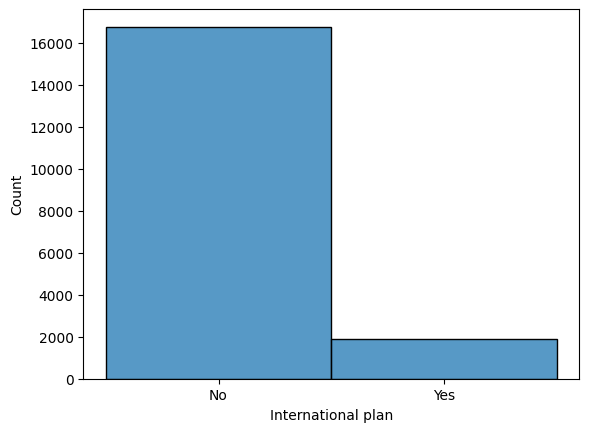

In [11]:

sns.histplot(df,x='International plan',weights=7)


In [12]:
df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Voice mail plan', ylabel='count'>

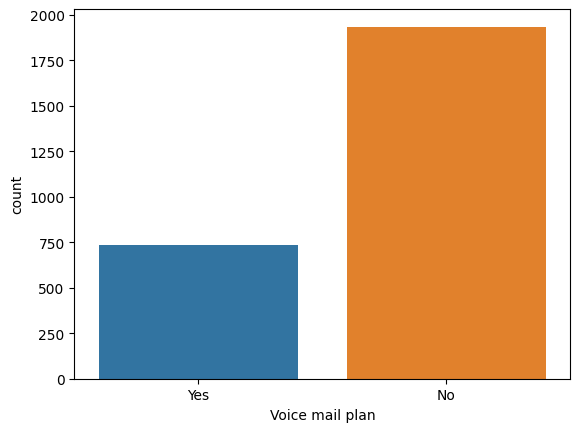

In [13]:
sns.countplot(df,x='Voice mail plan')

In [14]:
df.head(2)

,Unnamed: 0,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,KS,128,415,No,Yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,1,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


<Axes: xlabel='Total day charge', ylabel='Total day calls'>

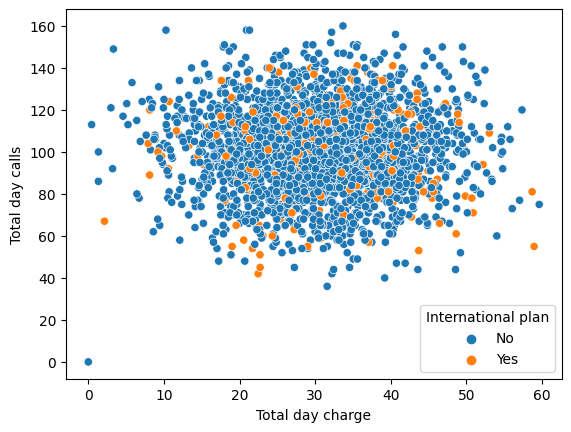

In [15]:
sns.scatterplot(data=df,x='Total day charge',y='Total day calls',hue='International plan')

# Encoding Method

In [16]:
ED=df[['International plan', 'Voice mail plan']]


In [17]:
from sklearn.preprocessing import LabelEncoder
Encod=LabelEncoder()
Chrn=LabelEncoder()

In [18]:
for i in ED:
    df[i]=Encod.fit_transform(df[i])

In [19]:
crn=df['Churn']

In [20]:
df['Churn']=Chrn.fit_transform(df['Churn'])

In [21]:
df.head(2)

,Unnamed: 0,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,KS,128,415,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,1,OH,107,415,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


# separate features

In [22]:
num=df.select_dtypes(include='int').columns
num

Index(['Unnamed: 0', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day calls',
       'Total eve calls', 'Total night calls', 'Total intl calls',
       'Customer service calls', 'Churn'],
      dtype='object')

In [23]:
x=df[['Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day calls',
       'Total eve calls', 'Total night calls', 'Total intl calls',
       'Customer service calls']]


In [24]:
y=df['Churn']

In [25]:
print(x.shape)


(2666, 10)


In [26]:
df.Churn.shape

(2666,)

# Split our Data into Train and Test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Features Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [30]:
X_train_Scaled=minmax.fit_transform(X_train)
X_train_Scaled

array([[0.52892562, 0.06862745, 0.        , ..., 0.46153846, 0.3       ,
        0.22222222],
       [0.31818182, 0.06862745, 0.        , ..., 0.85384615, 0.3       ,
        0.11111111],
       [0.14049587, 0.        , 0.        , ..., 0.63076923, 0.1       ,
        0.55555556],
       ...,
       [0.24380165, 1.        , 0.        , ..., 0.58461538, 0.3       ,
        0.22222222],
       [0.34297521, 1.        , 0.        , ..., 0.65384615, 0.25      ,
        0.22222222],
       [0.34710744, 1.        , 0.        , ..., 0.73076923, 0.2       ,
        0.22222222]])

In [31]:
 X_test_Scaled=minmax.transform(X_test)  # we will also use transform methode for X_test
X_test_Scaled

array([[0.47107438, 1.        , 1.        , ..., 0.54615385, 0.4       ,
        0.11111111],
       [0.6446281 , 0.06862745, 1.        , ..., 0.4       , 0.25      ,
        0.        ],
       [0.34297521, 0.06862745, 0.        , ..., 0.5       , 0.25      ,
        0.11111111],
       ...,
       [0.53719008, 1.        , 0.        , ..., 0.36153846, 0.15      ,
        0.        ],
       [0.37190083, 0.06862745, 0.        , ..., 0.43076923, 0.2       ,
        0.11111111],
       [0.52892562, 0.06862745, 0.        , ..., 0.45384615, 0.3       ,
        0.11111111]])

# Model Selection

In [32]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier

In [33]:

ada=AdaBoostClassifier(learning_rate=0.5,random_state=42)
gbc=GradientBoostingClassifier(learning_rate=0.6,random_state=42,n_estimators=100)
hgc=HistGradientBoostingClassifier(learning_rate=0.5,random_state=42)

In [34]:
ada.fit(X_train_Scaled,y_train)
gbc.fit (X_train_Scaled,y_train)
hgc.fit(X_train_Scaled,y_train)

HistGradientBoostingClassifier(learning_rate=0.5, random_state=42)

In [35]:
predct_ada=ada.predict(X_test_Scaled)
predct_gbc=gbc.predict(X_test_Scaled)
predct_hgc=hgc.predict(X_test_Scaled)

# Evaluation Method

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
ac_ada=accuracy_score(predct_ada,y_test)
ac_gbc=accuracy_score(predct_gbc,y_test)
ac_hgc=accuracy_score(predct_hgc,y_test)

In [38]:
print("Ada Boosting Accuracy:",ac_ada)
print("Gradient Boosting Accuracy:",ac_gbc)
print("Hist Gradient Boosting Accuracy:",ac_hgc)

Ada Boosting Accuracy: 0.8632958801498127
Gradient Boosting Accuracy: 0.8408239700374532
Hist Gradient Boosting Accuracy: 0.8745318352059925


In [39]:
cm_ada=confusion_matrix(predct_ada,y_test)
cm_gbc=confusion_matrix(predct_gbc,y_test)
cm_hgc=confusion_matrix(predct_hgc,y_test)

In [40]:
print("Ada Boosting Accuracy:",  cm_ada)

print("Gradient Boosting Accuracy:",cm_gbc)

print("Hist Gradient Boosting Accuracy:",cm_hgc)

Ada Boosting Accuracy: [[444  62]
 [ 11  17]]
Gradient Boosting Accuracy: [[418  48]
 [ 37  31]]
Hist Gradient Boosting Accuracy: [[439  51]
 [ 16  28]]


In [41]:
cr_ada=classification_report(predct_ada,y_test)
cr_gbc=classification_report(predct_gbc,y_test)
cr_hgc=classification_report(predct_hgc,y_test)

In [42]:
print("Ada Boosting Accuracy:",  cr_ada)

print("Gradient Boosting Accuracy:",cr_gbc)

print("Hist Gradient Boosting Accuracy:",cr_hgc)

Ada Boosting Accuracy:               precision    recall  f1-score   support

           0       0.98      0.88      0.92       506
           1       0.22      0.61      0.32        28

    accuracy                           0.86       534
   macro avg       0.60      0.74      0.62       534
weighted avg       0.94      0.86      0.89       534

Gradient Boosting Accuracy:               precision    recall  f1-score   support

           0       0.92      0.90      0.91       466
           1       0.39      0.46      0.42        68

    accuracy                           0.84       534
   macro avg       0.66      0.68      0.66       534
weighted avg       0.85      0.84      0.85       534

Hist Gradient Boosting Accuracy:               precision    recall  f1-score   support

           0       0.96      0.90      0.93       490
           1       0.35      0.64      0.46        44

    accuracy                           0.87       534
   macro avg       0.66      0.77      0.69 

# Cross Validation


In [43]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [44]:
scores_ada=cross_val_score(ada,x,y,cv=5)
scores_gb=cross_val_score(gbc,x,y,cv=5)
scores_hg=cross_val_score(hgc,x,y,cv=5)

In [45]:
print("Scores off Ada Boosting:",scores_ada)
print("Scores off Gradient Boosting:",scores_gb)
print("Scores off Hist Gradient Boosting:",scores_hg)

Scores off Ada Boosting: [0.85955056 0.87242026 0.86116323 0.86866792 0.87429644]
Scores off Gradient Boosting: [0.84831461 0.86491557 0.85178236 0.86116323 0.83677298]
Scores off Hist Gradient Boosting: [0.86142322 0.86491557 0.86679174 0.88555347 0.84615385]


# Assumption

In [ ]:
plt.scatter(predct_hgc,y_test)

In [47]:
# predct_ada=ada.predict(X_test_Scaled)
# predct_gbc=gbc.predict(X_test_Scaled)
# predct_hgc=hgc.predict(X_test_Scaled)

C:\Users\Ganesh Jaiswar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


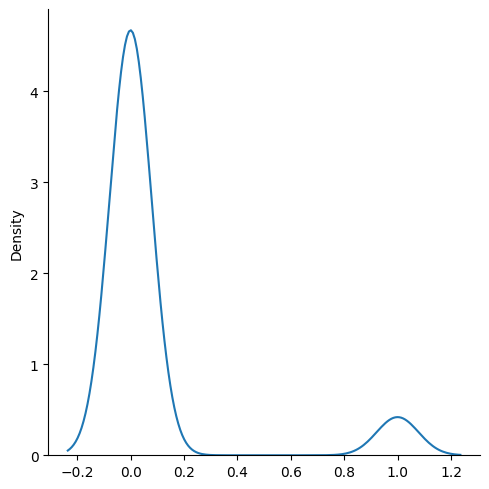

In [48]:
sns.displot(predct_hgc,kind='kde')

In [49]:
residuals=y_test-predct_hgc
residuals

2087    1
1915    0
479     0
1898    1
741     0
       ..
1196    0
958     0
861     0
1510    0
1992    1
Name: Churn, Length: 534, dtype: int64

C:\Users\Ganesh Jaiswar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


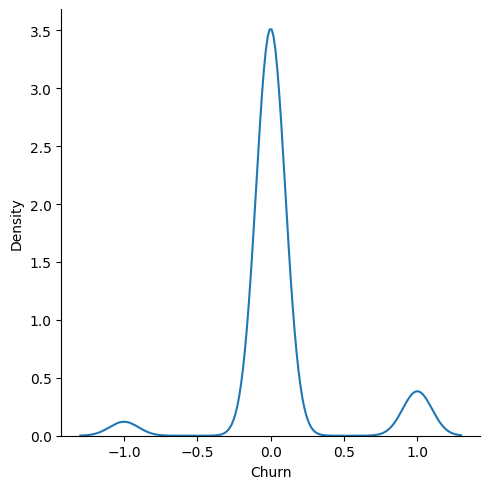

In [50]:
sns.displot(residuals,kind='kde')
plt.show()

# model are good 